In [28]:
# Python 3.9.0
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from conversation_data.csv
df = pd.read_csv('conversation_data.csv')

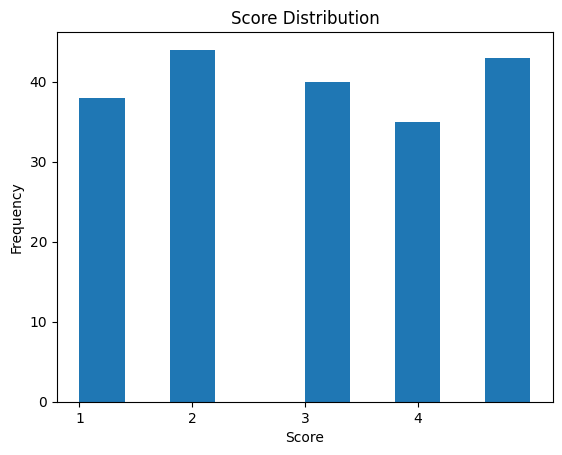

In [29]:
# Create a bar chart using column score from the dataframe
plt.hist(df['score'], bins=10)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 5, 1))
plt.show()

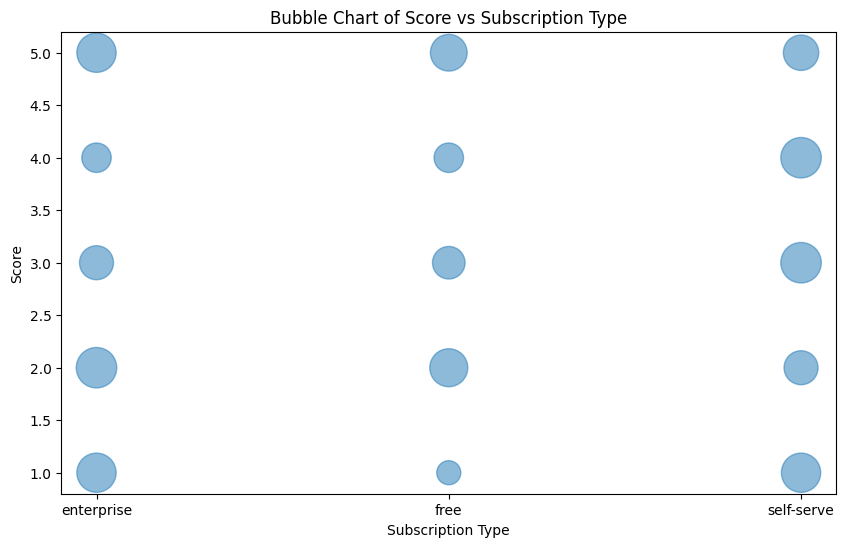

In [30]:
# Create bubble chart with score on the y axis subscruption_type on the x axis and number of users as the size of the bubble using the dataframe
grouped_df = df.groupby(['subscription_type', 'score']).size().reset_index(name='number_of_users')
grouped_df.head()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bubble chart
plt.scatter(grouped_df['subscription_type'], grouped_df['score'], s=grouped_df['number_of_users']*50, alpha=0.5)

plt.xlabel('Subscription Type')
plt.ylabel('Score')
plt.title('Bubble Chart of Score vs Subscription Type')
plt.grid(False)


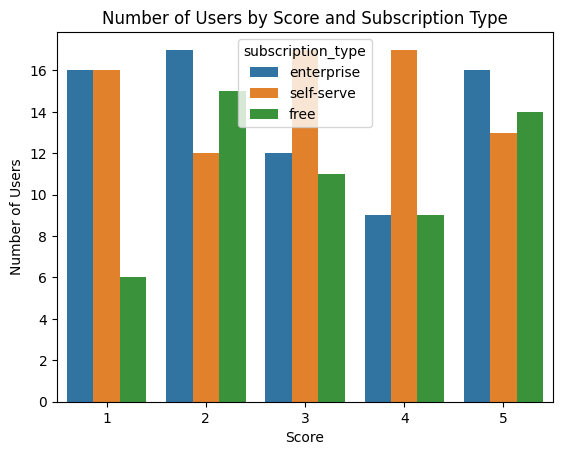

In [31]:
# Create a grouped bar chart with the score on the x axis and the number of users on the y axis grouped by the subscription type
sns.countplot(data = df, x = 'score', hue = 'subscription_type')
plt.xlabel('Score')
plt.ylabel('Number of Users')
plt.title('Number of Users by Score and Subscription Type');


<AxesSubplot: ylabel='company_name'>

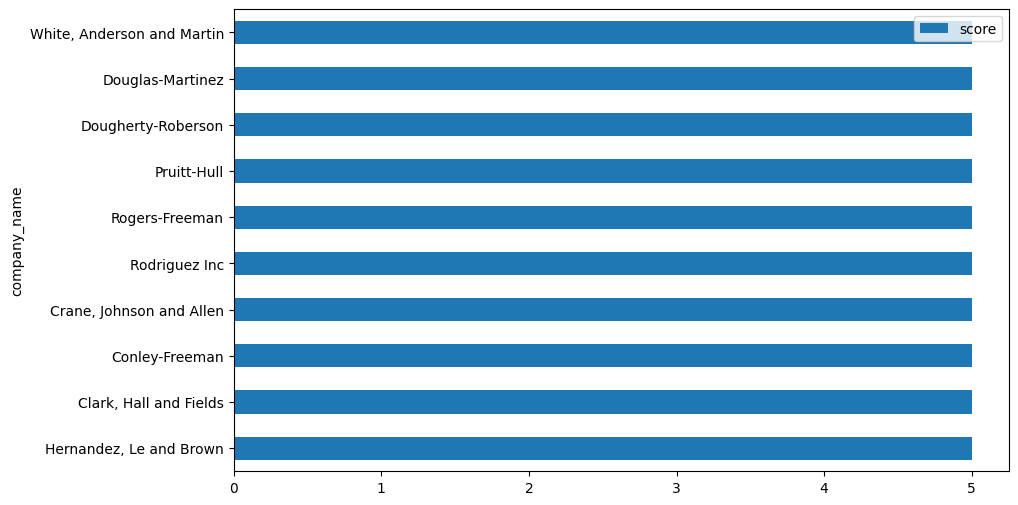

In [32]:
# Create a vertical bar chart with companies on the y axis and their average score on the x axis from the dataframe
# create a new datafroame grouping the companies and calculating the average score for each company
company_score = pd.DataFrame(df.groupby('company_name')['score'].mean())
company_score = company_score.sort_values(by='score', ascending=False)
company_score.head(10).plot(kind='barh', figsize=(10, 6))

<AxesSubplot: ylabel='support_agent_id'>

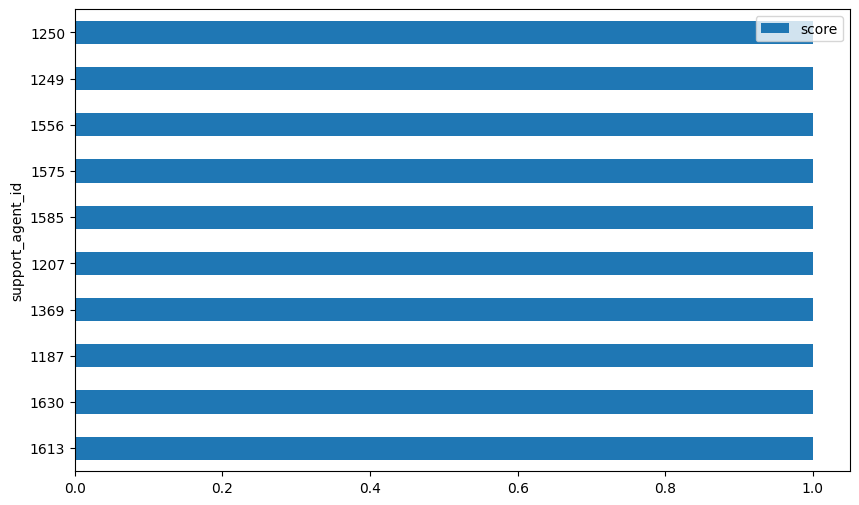

In [33]:
# Create a bar chart based on the average score for each support agent
# Group df by support agent and calculate average score
agent_score_group = pd.DataFrame(df.groupby('support_agent_id')['score'].mean())
# Order it descendingly by score
agent_score_group = agent_score_group.sort_values(by='score', ascending=True)
agent_score_group.head()
# Create a vertical bar chart 
agent_score_group.head(10).plot(kind='barh', figsize=(10, 6))

/var/folders/q5/129jvbqn7697cxyglg65t6gr0000gn/T/ipykernel_11403/3671080088.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agent_duration_group = df.groupby('support_agent_id').mean().reset_index()


<AxesSubplot: ylabel='support_agent_id'>

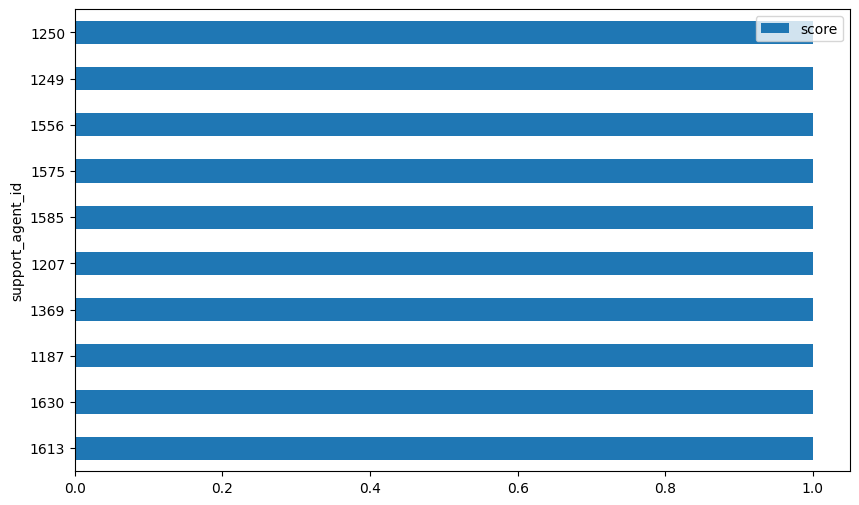

In [34]:
# Convert the started_at and closed_at column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['duration'] = df['closed_at'] - df['started_at']
# Convert the duration column to hours
df['duration'] = df['duration'].astype('timedelta64[h]')

# Group the dataframe by support_agent_id and calculate the mean of the duration column
agent_duration_group = df.groupby('support_agent_id').mean().reset_index()
# Sort the dataframe by the duration column
agent_duration_group = agent_duration_group.sort_values(by='duration', ascending=True).reset_index(drop=True)

agent_score_group.head(10).plot(kind='barh', figsize=(10, 6))

Text(0, 0.5, 'Average Score')

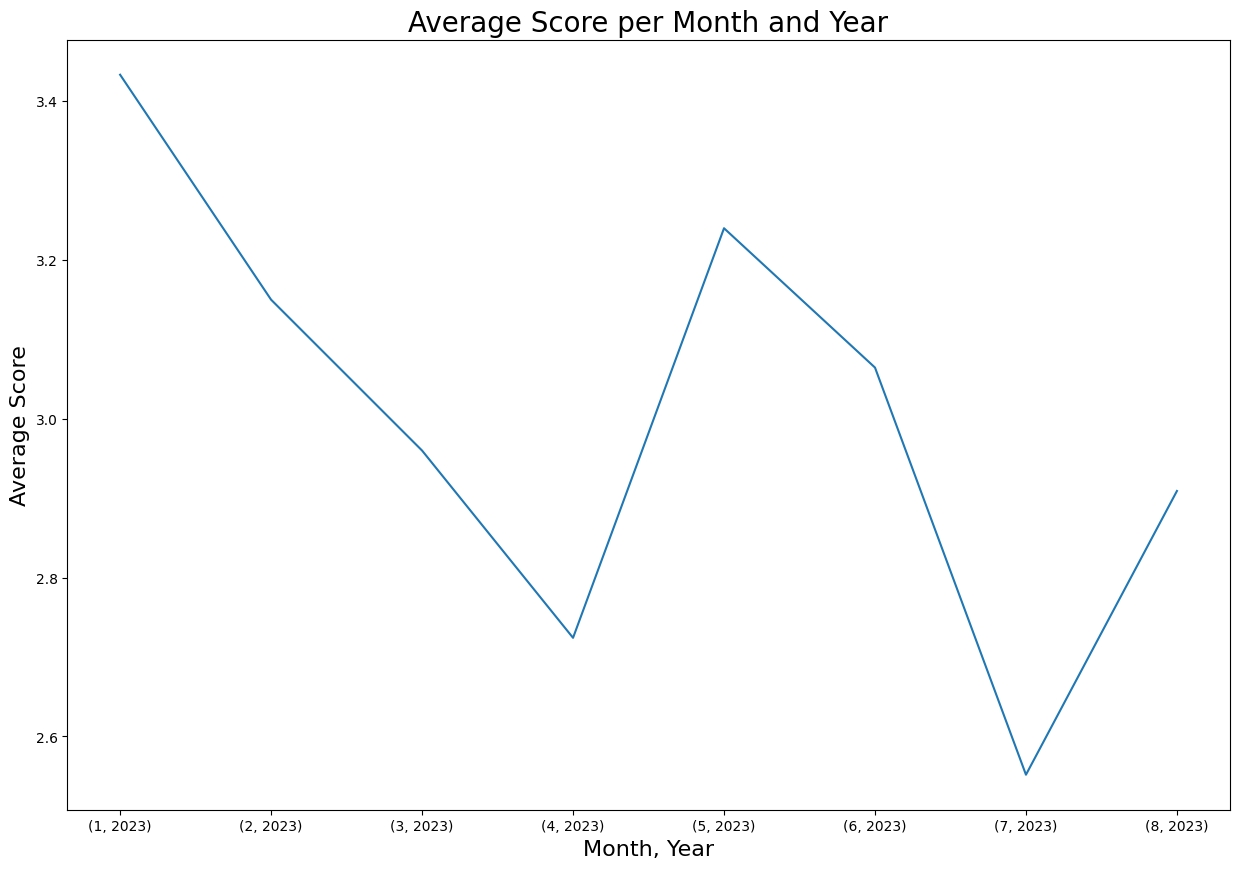

In [35]:
# group the created_at column by month and year
df['created_at'] = pd.to_datetime(df['created_at'])
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df.head()

# group the created_at column by month and year and average the score column
date_score_group = df.groupby(['month', 'year'])['score'].mean()

# plot the average score per month and year
date_score_group.plot(kind='line', figsize=(15, 10))
plt.title('Average Score per Month and Year', fontsize=20)
plt.xlabel('Month, Year', fontsize=16)
plt.ylabel('Average Score', fontsize=16)

<AxesSubplot: title={'center': 'Average Score by Subscription Type'}, ylabel='subscription_type'>

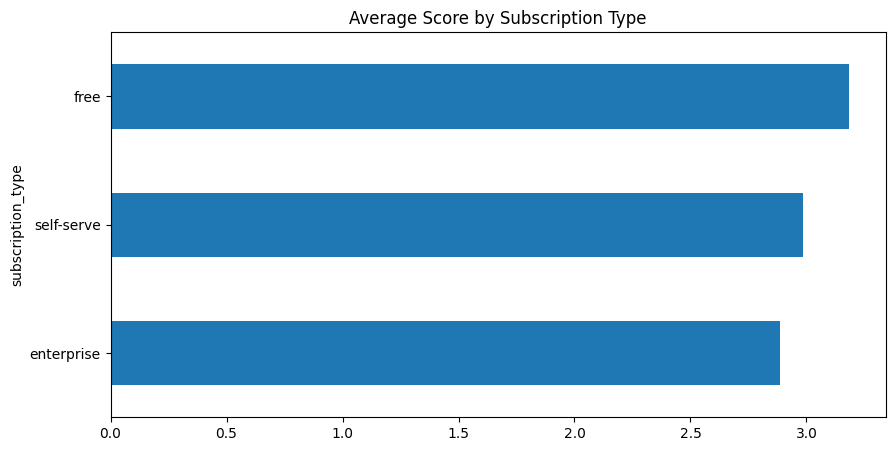

In [36]:
sub_score_group = df.groupby(['subscription_type'])['score'].mean()
sub_score_group = sub_score_group.sort_values(ascending=True)
sub_score_group.plot(kind='barh', figsize=(10,5), title='Average Score by Subscription Type')

Text(0, 0.5, 'Average Duration of Calls')

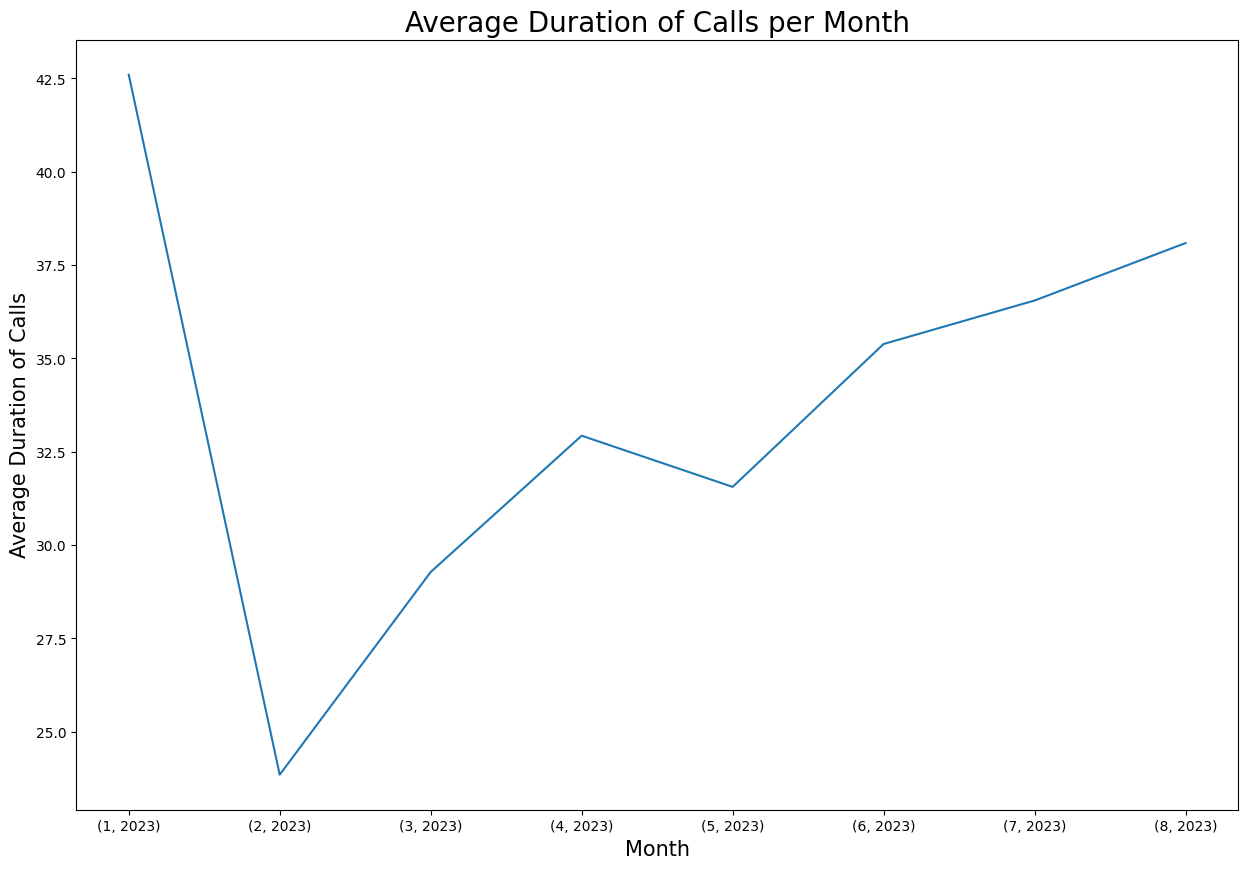

In [37]:
con_dur_group = df.groupby(['month', 'year'])['duration'].mean()
con_dur_group.plot(kind='line', figsize=(15, 10))
plt.title('Average Duration of Calls per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Duration of Calls', fontsize=15)

<AxesSubplot: title={'center': 'Average Score by Conversation Type'}, ylabel='conversation_type'>

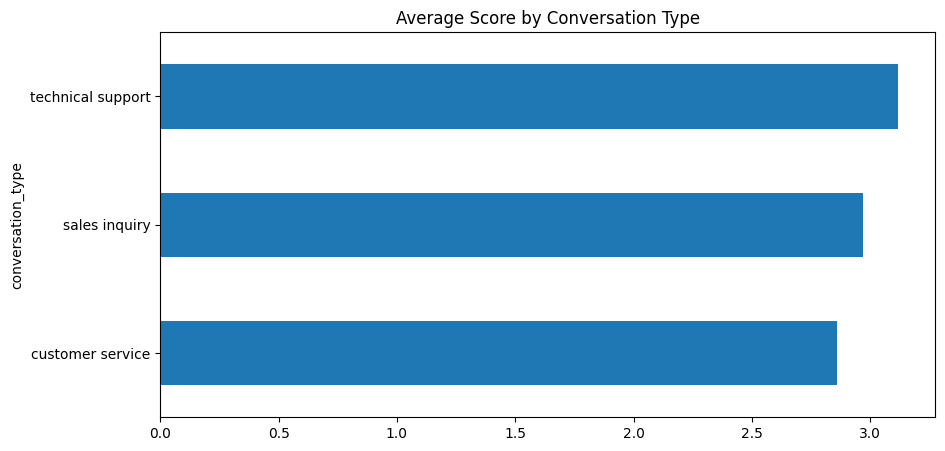

In [38]:
conv_score_group = df.groupby(['conversation_type'])['score'].mean()
conv_score_group = conv_score_group.sort_values(ascending=True)
conv_score_group.plot(kind='barh', figsize=(10,5), title='Average Score by Conversation Type')

Text(0, 0.5, 'Number of conversations')

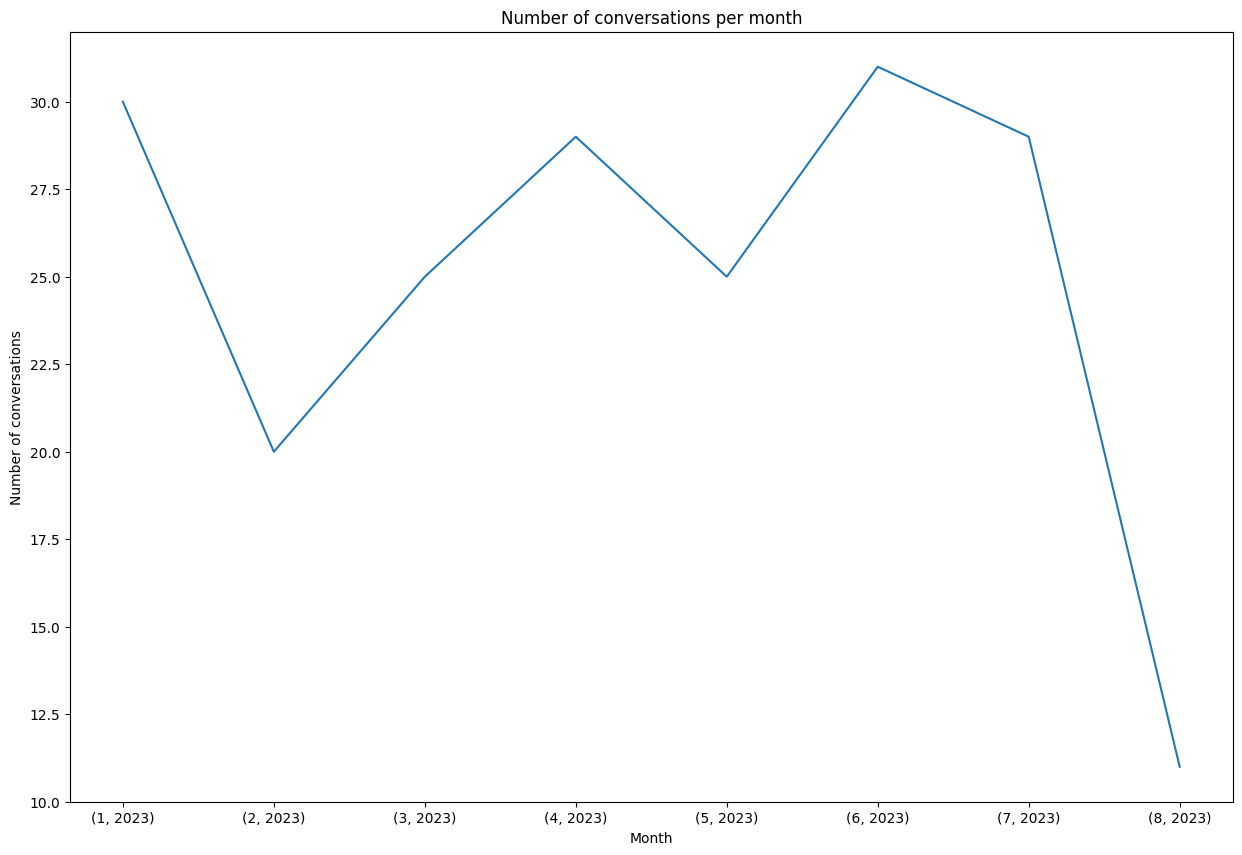

In [39]:
con_cnt_group = df.groupby(['month', 'year'])['conversation_id'].count()
con_cnt_group.plot(kind='line', figsize=(15, 10))
plt.title("Number of conversations per month")
plt.xlabel("Month")
plt.ylabel("Number of conversations")